In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0


In [5]:
df.apply(wrangle.minMax)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
min,2.0,1.5,2.0,22.0,1801.0,16.48,6037.0
max,5.0,3.0,4107.0,1164536.0,2016.0,12686.52,6111.0


In [6]:
df.shape

(1475147, 7)

In [7]:
#Split data into train, validate and test using split_data function in wrangle.py
train, validate, test = wrangle.split_data(df)

In [8]:
train.shape

(826081, 7)

In [9]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
278237,3.0,2.0,1644.0,405574.0,1962.0,4833.68,6059.0
245132,3.0,2.0,1312.0,366057.0,1957.0,4372.48,6059.0
1369940,3.0,3.0,1524.0,177000.0,1990.0,3295.43,6037.0
1533627,3.0,2.0,1696.0,681822.0,1962.0,7983.41,6037.0
181419,3.0,2.0,1092.0,251452.0,1972.0,3285.26,6059.0
...,...,...,...,...,...,...,...
526708,2.0,1.5,1234.0,72525.0,1964.0,752.62,6059.0
169619,4.0,2.0,1251.0,242527.0,1955.0,2981.02,6059.0
838674,3.0,2.5,2248.0,323245.0,1976.0,3385.82,6059.0
1566281,4.0,3.0,1497.0,493659.0,1949.0,5985.71,6037.0


### Min-Max Scaling

Text(0.5, 1.0, 'Scaled')

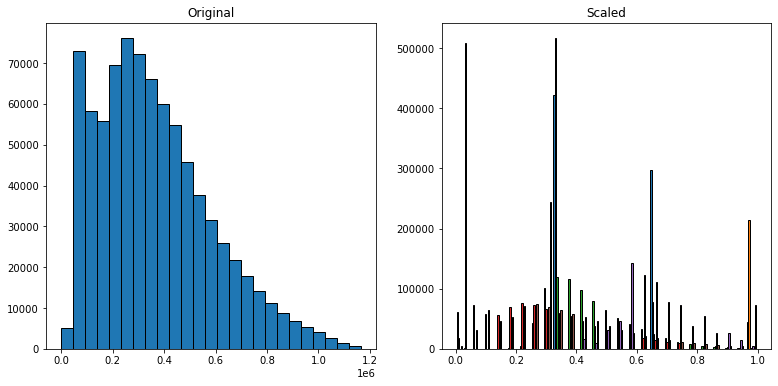

In [11]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

# 2. fit the object (learn the min and max value)
scaler.fit(train)

# 3. use the object (use the min, max to do the transformation)
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [ ]:
scaler.inverse_transform(train)

In [ ]:
train

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10,output_distribution='normal', random_state=0)
qt.fit_transform(train)

In [ ]:
train_scaled = qt.transform(train)

In [ ]:
train_scaled.columns

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled')

In [ ]:
train.columns

In [ ]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
scaler.fit(train[['taxvaluedollarcnt']])

# 3. use the object
train['taxvaluedollarcnt'] = scaler.transform(train[['taxvaluedollarcnt']])

#plot the scaled and unscaled distribution
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.taxvaluedollarcnt.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Quantile Transformed to Normal');